In [3]:
import pandas as pd
df= pd.read_csv(r"C:\Users\mahil\OneDrive\Desktop\projects\walmart-sales-forecasting\data\walmart.csv")
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df = df.sort_values(by='Date')

In [ ]:
store_df=df[df['Store']==1].copy()
store_df=store_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
store_df.set_index('Date', inplace=True)

Text(0, 0.5, 'Weekly Sales')

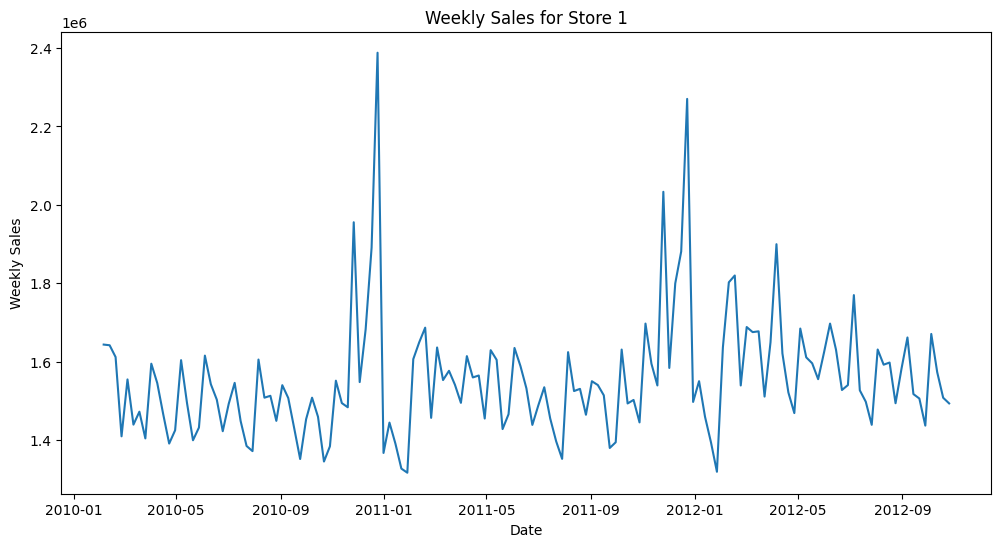

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.plot(store_df['Weekly_Sales'])
plt.title("Weekly Sales for Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")


In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(store_df['Weekly_Sales'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -5.102186145192286
p-value: 1.3877788330759535e-05


In [7]:
train = store_df.iloc[:-20]
test = store_df.iloc[-20:]


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(
    train['Weekly_Sales'],
    order=(1, 0, 1),         #p=1 (depends on 1 previous value), d=0 (no differencing data is stationary), q=1 (depends on 1 previous error)       
    seasonal_order=(1, 1, 1, 52),  # P=1,(Seasonal AutoRegressive 1 seassonal lag) D=1,(Seasonal differenciing removes annual seasonality) Q=1(Seasonal Moving Average 1 seasonal error log), S=52 Season length- yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


c:\Users\mahil\OneDrive\Desktop\projects\walmart-sales-forecasting\walmart\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\mahil\OneDrive\Desktop\projects\walmart-sales-forecasting\walmart\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  123
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 52)   Log Likelihood                -214.128
Date:                            Sat, 05 Jul 2025   AIC                            438.256
Time:                                    07:28:13   BIC                            442.422
Sample:                                02-05-2010   HQIC                           438.670
                                     - 06-08-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9670      0.134      7.207      0.000       0.704       1.230
ma.L1         -0.9615      0.165   

In [26]:
forecast = results.get_forecast(steps=20)
pred = forecast.predicted_mean

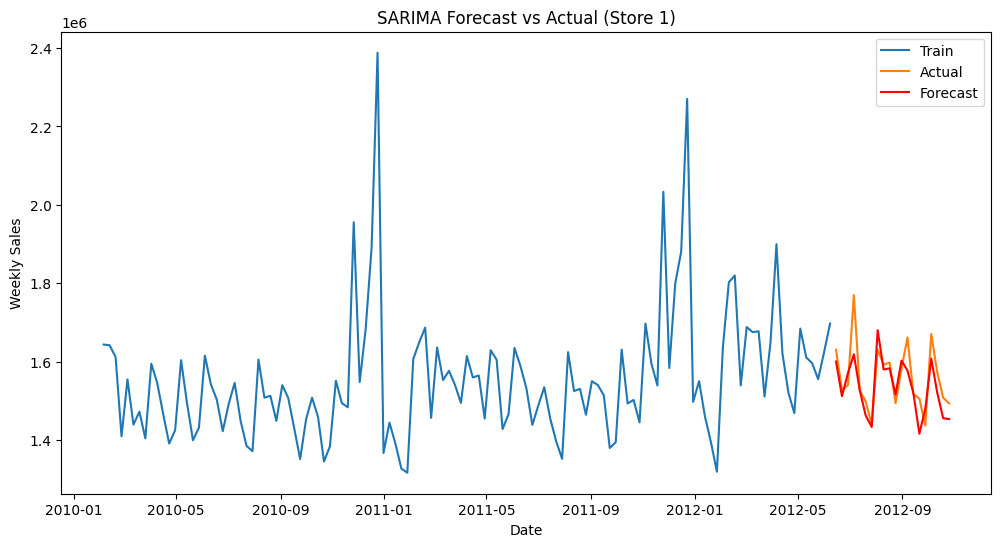

In [27]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Actual')
plt.plot(test.index, pred, label='Forecast', color='red')
plt.title("SARIMA Forecast vs Actual (Store 1)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
